Activation functions are an essential component of artificial neural networks, including deep learning models. They introduce non-linearities to the network, enabling it to learn complex patterns and relationships in the data. Here's an overview of activation functions, their properties, and common types:

1. **Purpose**:
   - Activation functions are applied to the output of each neuron (or unit) in a neural network layer, transforming the neuron's input into its output.
   - They introduce non-linearities, allowing neural networks to approximate non-linear functions and learn complex relationships in the data.
   - Without activation functions, neural networks would be limited to representing linear transformations of the input data, severely limiting their expressive power.

2. **Properties of Ideal Activation Functions**:
   - Non-linearity: Activation functions should be non-linear, allowing neural networks to approximate arbitrary non-linear functions.
   - Continuity: Activation functions should be continuous to ensure smooth gradients during optimization.
   - Differentiability: Activation functions should be differentiable to enable gradient-based optimization techniques like backpropagation.
   - Boundedness: Some activation functions are bounded to a finite range, preventing activations from growing too large and causing numerical instability (e.g., exploding gradients).


| Feature                        | Step Function                                            | Sigmoid Function                            | ReLU (Rectified Linear Unit)                                           | ELU (Exponential Linear Unit)                                             | TanH (Hyperbolic Tangent)                          | Softmax                                                   |
| ------------------------------ | -------------------------------------------------------- | ------------------------------------------- | ---------------------------------------------------------------------- | ------------------------------------------------------------------------- | -------------------------------------------------- | --------------------------------------------------------- |
| **Function**                   | f(x) = 1 if x >= 0, else 0                               | f(x) = 1 / (1 + exp(-x))                    | f(x) = max(0, x)                                                       | f(x) = max(0, α(exp(x) - 1))                                              | f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))     | f(x) = exp(x_i) / Σ(exp(x_j)) for all i                   |
| **Output Range**               | {0, 1}                                                   | (0, 1)                                      | (0, ∞)                                                                 | (α, ∞)                                                                    | (-1, 1)                                            | (0, 1) (sum to 1)                                         |
| **Differentiability**          | Not differentiable at x = 0                              | Differentiable everywhere                   | Differentiable everywhere                                              | Differentiable everywhere                                                 | Differentiable everywhere                          | Differentiable everywhere                                 |
| **Vanishing Gradient Problem** | N/A (not a common issue for this function)               | Yes                                         | No                                                                     | No                                                                        | No                                                 | Not applicable (used in output layer)                     |
| **Advantages**                 | Simple to implement                                      | Smooth output, can be used as a probability | Fast to compute, avoids vanishing gradient problem                     | Smooth output, avoids vanishing gradient problem, avoids dying ReLU issue | Centered output, avoids vanishing gradient problem | Outputs sum to 1, suitable for multi-class classification |
| **Disadvantages**              | Not suitable for many applications due to hard threshold | Sensitive to noisy data, slow learning      | Can cause "dying ReLU" issue where neurons become permanently inactive | Parameter α needs careful tuning                                          | May saturate for large negative inputs             | Not suitable for regression tasks                         |


![af](https://miro.medium.com/v2/resize:fit:1400/0*uyTgQn76Bubw6TRh)

## Example

Let's consider a simple example using the sigmoid activation function. The sigmoid function is commonly used in neural networks to introduce nonlinearity into the output of a neuron.

The sigmoid function is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}}$$

where \( z \) is the linear output of the neuron (the weighted sum of inputs plus bias).

Now, let's say we have a neuron with three inputs, $ x_1 $, $x_2$, and $x_3$, and corresponding weights \( w_1 \), \( w_2 \), and \( w_3 \), and a bias term \( b \). The linear output of this neuron can be represented as:


$$[ z = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b ]$$

This is the linear combination of inputs and weights, and it's essentially a linear function of the inputs.

Now, let's apply the sigmoid activation function to this linear output:

$$ \text{Output} = \sigma(x) = \frac{1}{1 + e^{-x}} $$


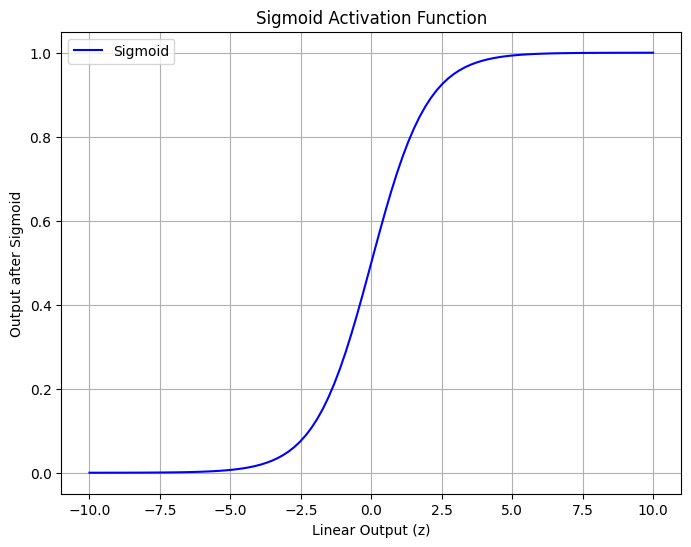

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate linear output values
z_values = np.linspace(-10, 10, 100)
# Apply sigmoid function to linear output
sigmoid_values = sigmoid(z_values)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(z_values, sigmoid_values, label='Sigmoid', color='blue')
plt.xlabel('Linear Output (z)')
plt.ylabel('Output after Sigmoid')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.legend()
plt.show()


This output value is now transformed non-linearly due to the sigmoid function. Here's a plot showing how the sigmoid function transforms the linear output:

This plot will show you how the sigmoid function transforms the linear output into a nonlinear range between 0 and 1. The output is close to 0 when the linear output is large negative, close to 1 when the linear output is large positive, and sigmoid gently transitions between these two extremes, introducing the desired nonlinearity into the neuron's output.

In [2]:
max(0,3)

3

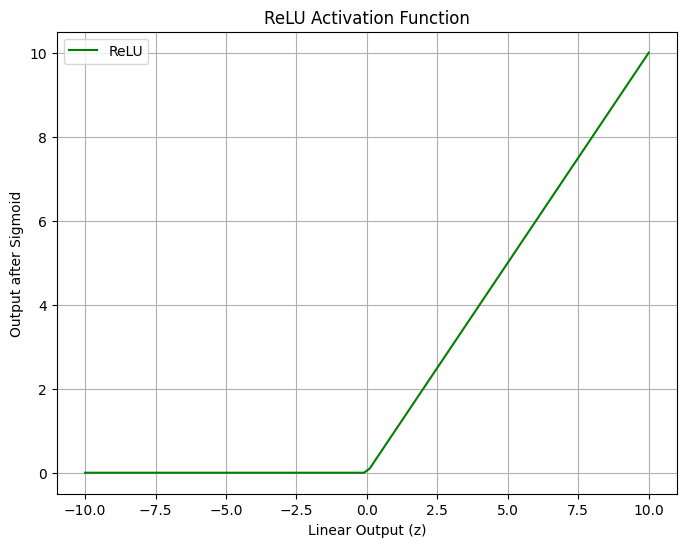

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def ReLu(z):
    return np.maximum(0,z)

# Generate linear output values
z_values = np.linspace(-10, 10, 100)
# Apply sigmoid function to linear output
relu_values = ReLu(z_values)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(z_values, relu_values, label='ReLU', color='green')
plt.xlabel('Linear Output (z)')
plt.ylabel('Output after Sigmoid')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.legend()
plt.show()

### Softmax Function

#### Sigmoid vs Softmax
| Feature               | Sigmoid                  | Softmax                               |
| --------------------- | ------------------------ | ------------------------------------- |
| Operates on           | Each value independently | Entire vector at once                 |
| Output                | 0 to 1 (not normalized)  | 0 to 1, **sums to 1**                 |
| Use case              | Binary classification    | Multi-class classification            |
| Output interpretation | One probability          | Probability distribution over classes |


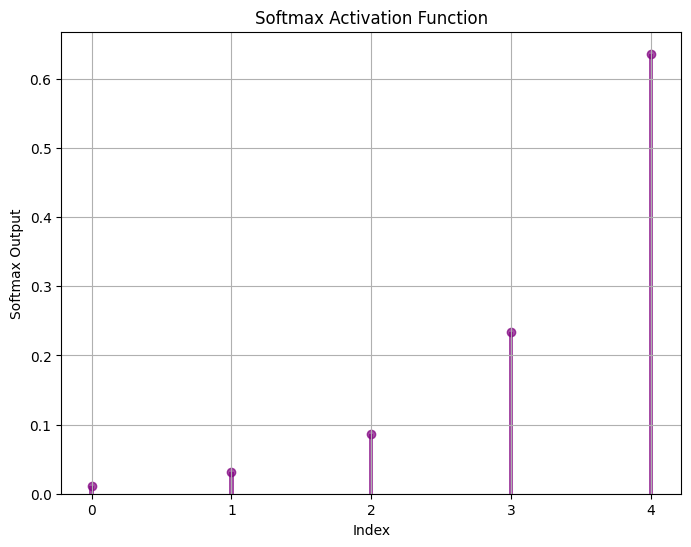

In [ ]:
# Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

# Generate linear output values
z_values = np.linspace(-2, 2, 5)
# Apply softmax function to linear output
softmax_values = softmax(z_values)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(softmax_values)), softmax_values, color='purple', alpha=0.7)
plt.bar(range(len(softmax_values)), softmax_values, color='purple', alpha=0.7, width=0.03)

plt.xlabel('Index')
plt.ylabel('Softmax Output')
plt.xticks(range(len(softmax_values)))
plt.title('Softmax Activation Function')
plt.grid(True)
plt.show()

Here’s the visual comparison:

* **Left Plot – Sigmoid Function**:
  You can see how the sigmoid smoothly maps any input $x$ to a value between 0 and 1. It’s applied to **each individual value** and does not care about any surrounding context.

* **Right Plot – Softmax Output**:
  This shows how softmax takes a **vector of values** (like logits for each class) and converts it into a **probability distribution**. The probabilities all add up to 1, and the largest input gets the highest probability.

So even though both output values between 0 and 1, sigmoid is **scalar** and softmax is **vector-based** and **normalized**.
